In [14]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=0x1337)

In [8]:
Fs = 44.1e3 # 44.1kHz for now
Tlen = 10 # [s]
tt = np.arange(0, Tlen, 1/Fs)

In [24]:
beacons = np.array([5e3, 6e3, 7e3, 8e3, 9e3, 10e3]) # [Hz]
sweep_bandwidth = 100 # Hz. sweep is from f_b - bandwidth/2 to f_b + bandwidth/2;
phases = np.random.uniform(0, 2*np.pi, size=beacons.shape) # scatter phases to avoid bunching up in the time domain

mixed = np.zeros_like(tt)
for f_b, φ in zip(beacons, phases):
    beacon_signal = scipy.signal.chirp(tt, f_b - sweep_bandwidth/2, Tlen, f_b + sweep_bandwidth/2, phi=φ*180/np.pi)
    mixed += beacon_signal / len(beacons)

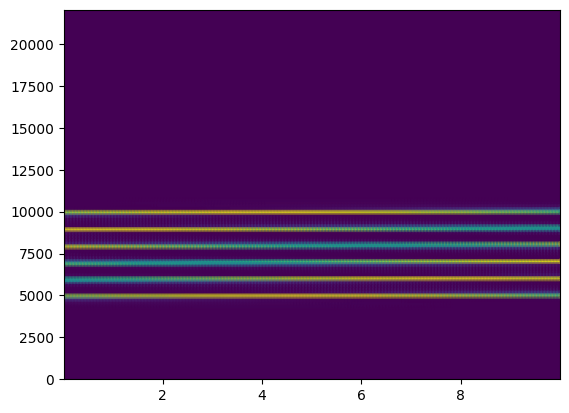

In [31]:
spf, spt, spSxx = scipy.signal.spectrogram(mixed, Fs)
plt.pcolormesh(spt, spf, spSxx, shading='gouraud')